In [1]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv
from sklearn.neural_network import MLPRegressor
from scripts.data_preprocessing import load_data, exclude_outliers, scale_data

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)

hidden_layer_configs = [(300,), (500,), (200, 100), (300, 200, 100),]
X_scaled = scale_data(X)
X_filtered_scaled = scale_data(X_filtered)

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


LOOCV NN with hidden layer sizes:  (300,)
R squared (LOOCV): 0.1235567051560501
Average MSE (LOOCV): 82.39439676292677
Average RMSE (LOOCV): 9.077135933923584
Average MAE (LOOCV): 5.60426211142147


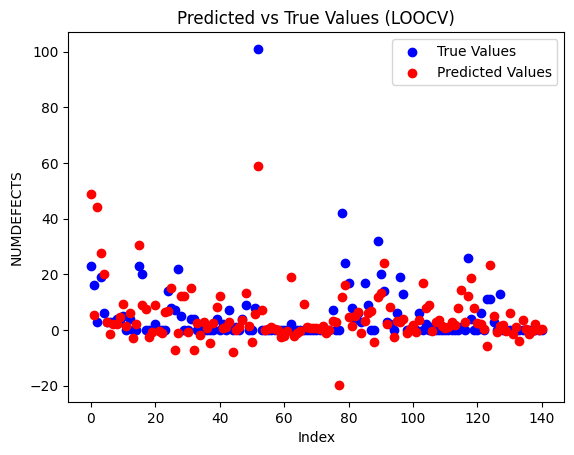

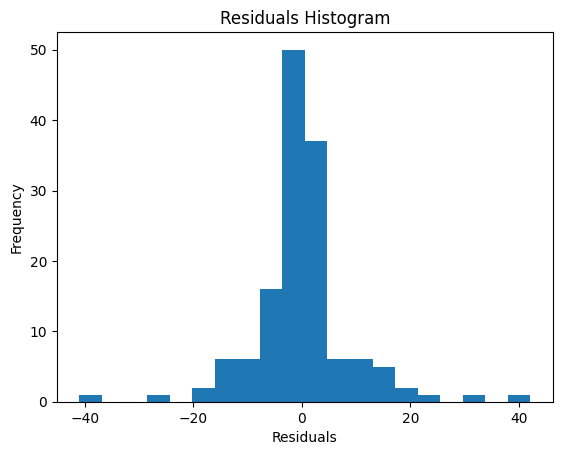

LOOCV NN with hidden layer sizes:  (500,)
R squared (LOOCV): 0.12390915136332281
Average MSE (LOOCV): 84.16933146121946
Average RMSE (LOOCV): 9.174384527651949
Average MAE (LOOCV): 5.616671944191613


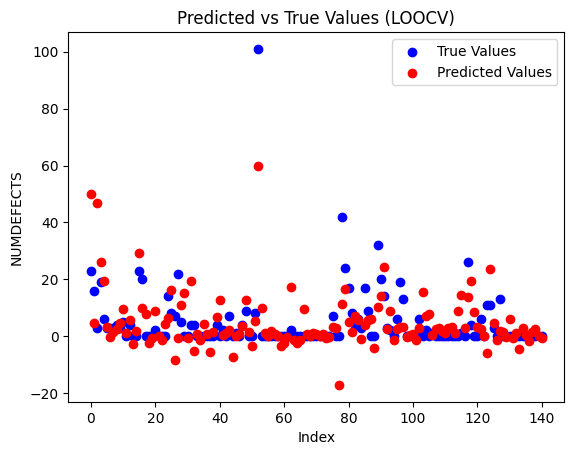

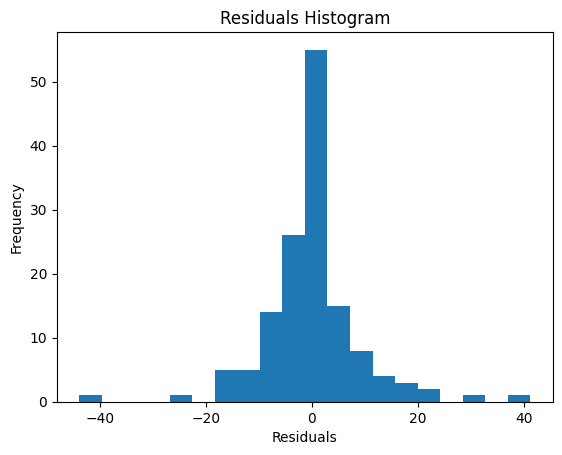

LOOCV NN with hidden layer sizes:  (200, 100)
R squared (LOOCV): -0.0029607205800292746
Average MSE (LOOCV): 77.93132778320734
Average RMSE (LOOCV): 8.827872211535878
Average MAE (LOOCV): 5.185991726252854


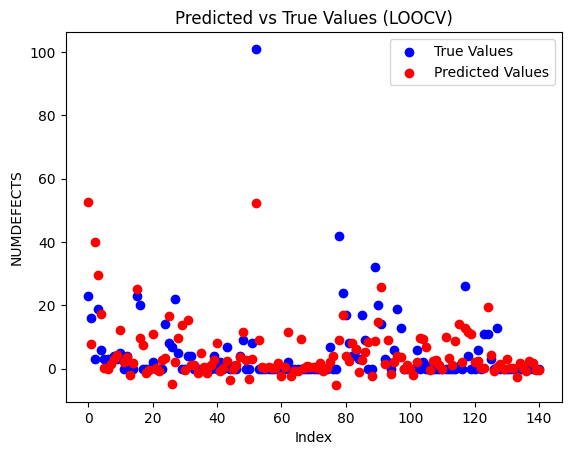

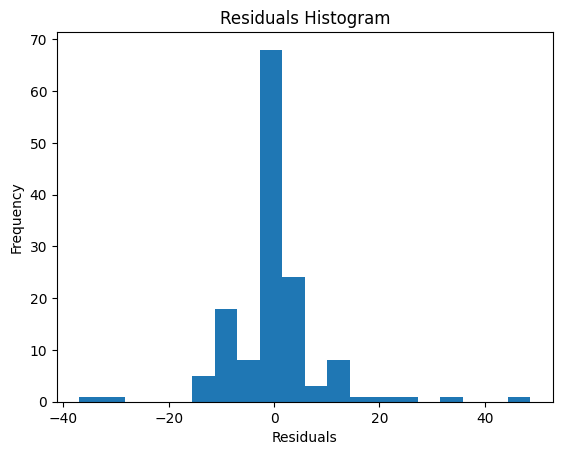

LOOCV NN with hidden layer sizes:  (300, 200, 100)
R squared (LOOCV): -0.15754482014255133
Average MSE (LOOCV): 78.20797335986734
Average RMSE (LOOCV): 8.84352720128498
Average MAE (LOOCV): 4.564431642037036


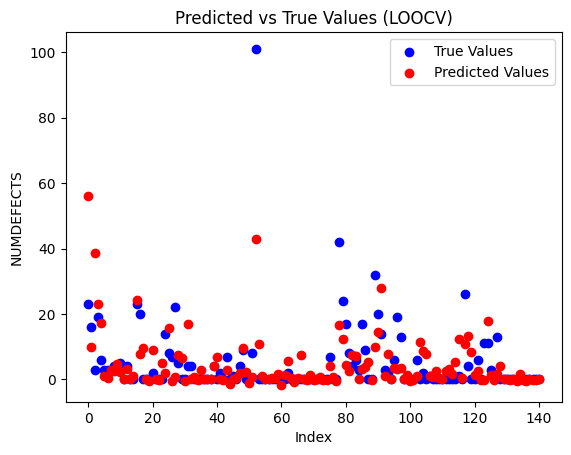

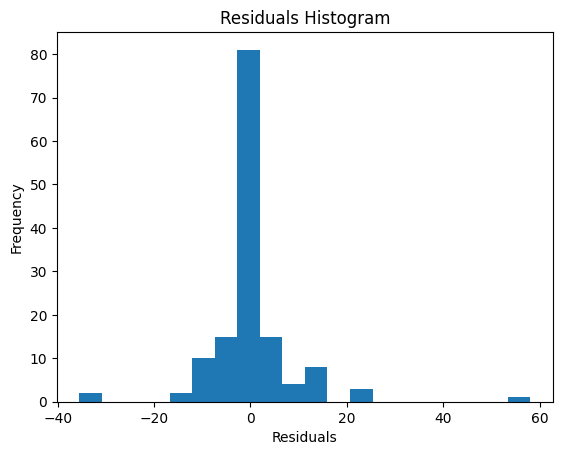

In [2]:

for size in hidden_layer_configs:
    mlp_regressor = MLPRegressor(
        hidden_layer_sizes=size,
        activation='relu',
        solver='adam',
        alpha=0.0003,
        max_iter=1500,
        random_state=42,
    )

    print('LOOCV NN with hidden layer sizes: ', size )
    loocv(X_scaled, y, mlp_regressor)


K-fold CV NN with hidden layer sizes:  (300,)
Mean MSE: 82.38624542469519
Mean MAE: 5.763641003061141
Mean R2: -0.5640963241873763
RMSE 9.076686918953149


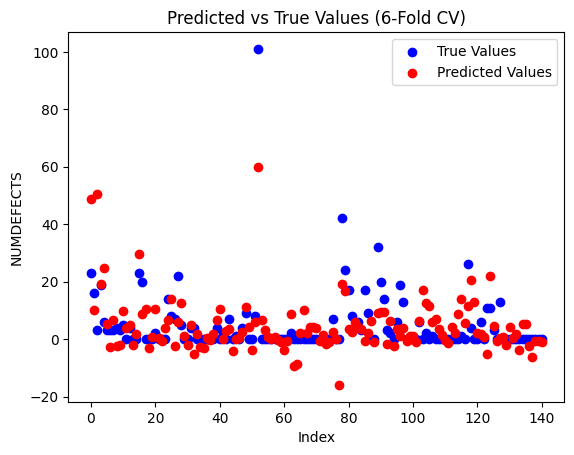

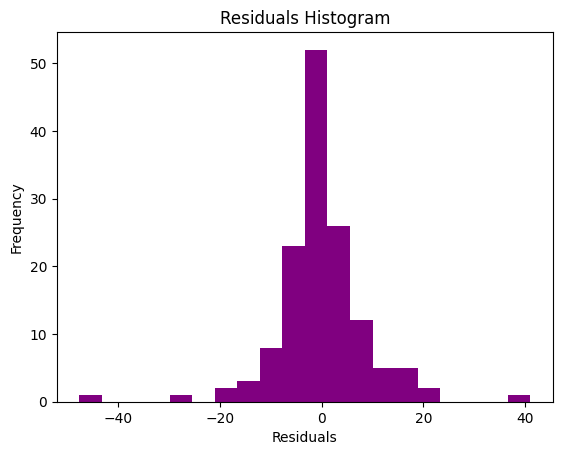

K-fold CV NN with hidden layer sizes:  (500,)
Mean MSE: 82.59901668557947
Mean MAE: 5.759625374076106
Mean R2: -0.6120676111034357
RMSE 9.088400116939145


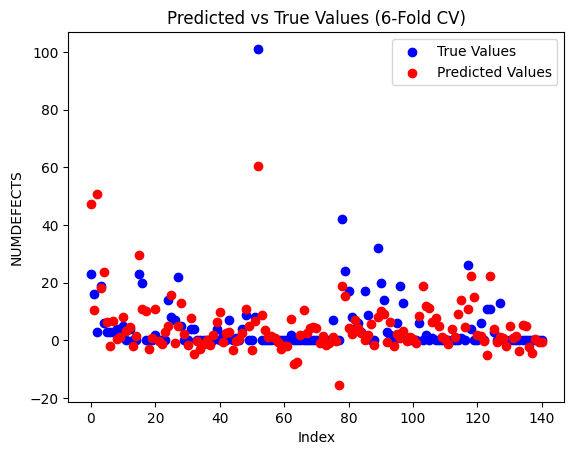

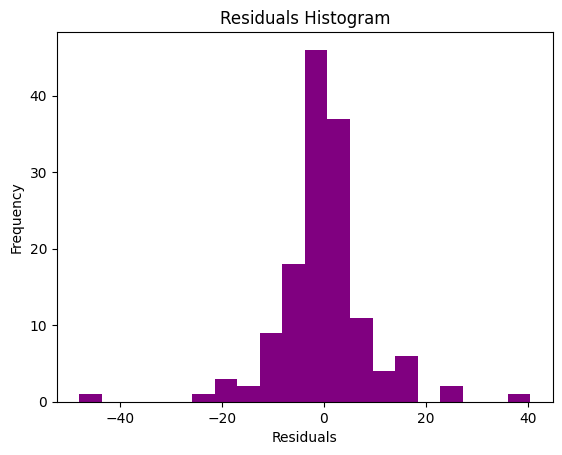

K-fold CV NN with hidden layer sizes:  (200, 100)
Mean MSE: 77.28701782508293
Mean MAE: 5.145073907897891
Mean R2: -0.2890207144258071
RMSE 8.791303533895467


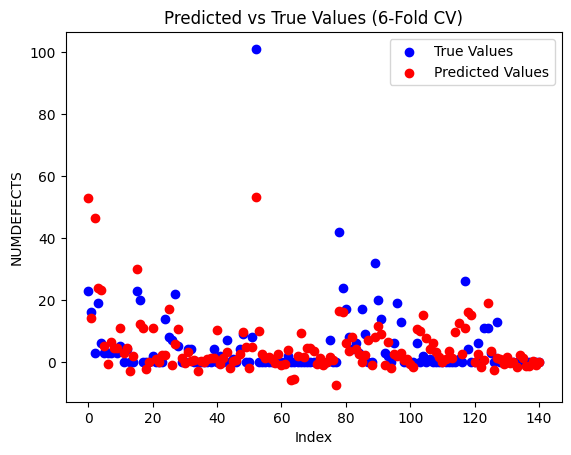

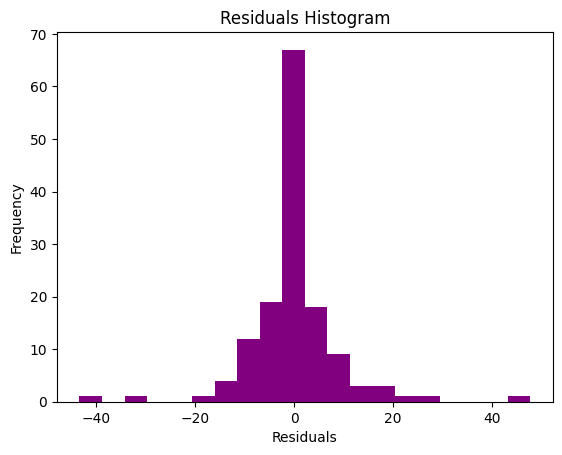

K-fold CV NN with hidden layer sizes:  (300, 200, 100)
Mean MSE: 89.81923419372322
Mean MAE: 4.765295406962751
Mean R2: -0.3938432811295276
RMSE 9.477300997315808


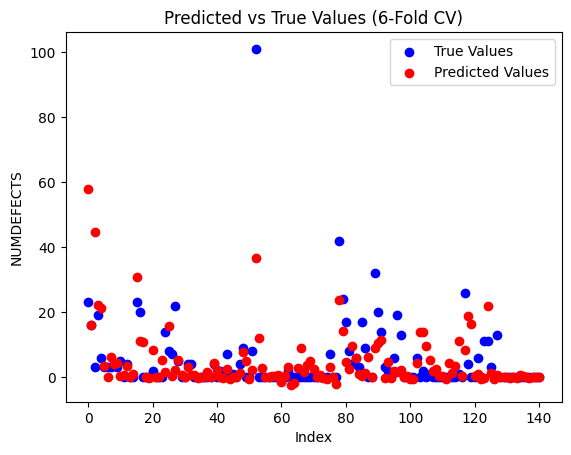

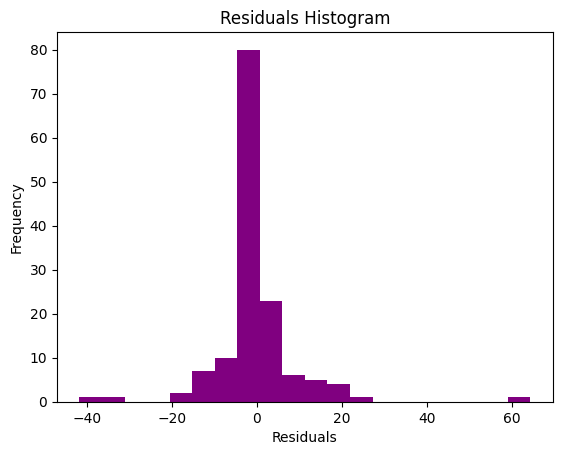

In [3]:
for size in hidden_layer_configs:
    mlp_regressor = MLPRegressor(
        hidden_layer_sizes=size,
        activation='relu',
        solver='adam',
        alpha=0.0003,
        max_iter=1500,
        random_state=42,
    )

    print('K-fold CV NN with hidden layer sizes: ', size )
    k_fold_cv(X_scaled, y, mlp_regressor, 6)

LOOCV NN with hidden layer sizes:  (300,)
R squared (LOOCV): -0.03487646142486489
Average MSE (LOOCV): 55216.508037817046
Average RMSE (LOOCV): 234.9819313007216
Average MAE (LOOCV): 100.28530880391254


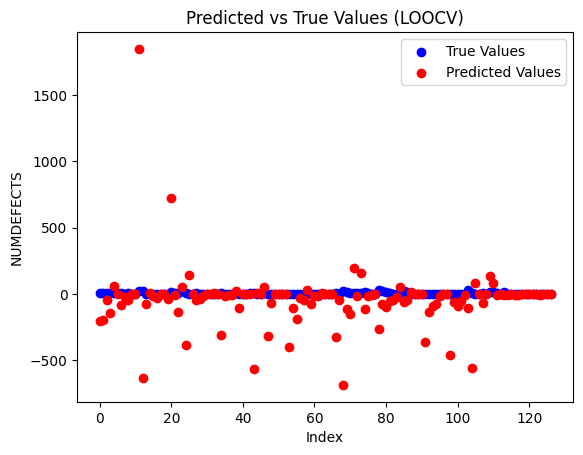

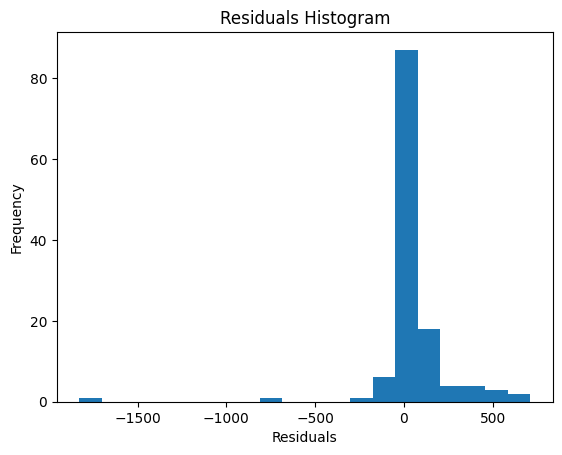

LOOCV NN with hidden layer sizes:  (500,)
R squared (LOOCV): 0.0028425176118690443
Average MSE (LOOCV): 104199.94183285286
Average RMSE (LOOCV): 322.8001577336245
Average MAE (LOOCV): 39.86729222245137


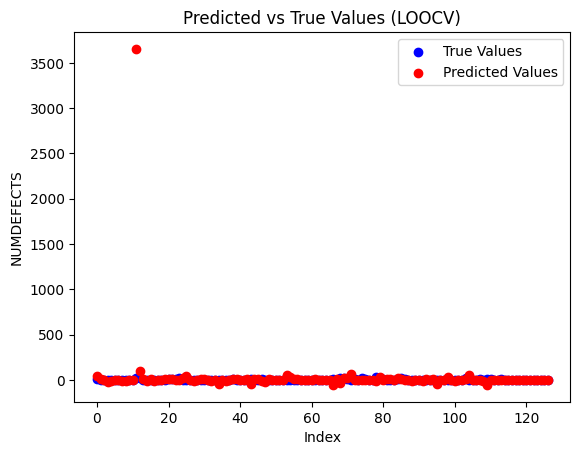

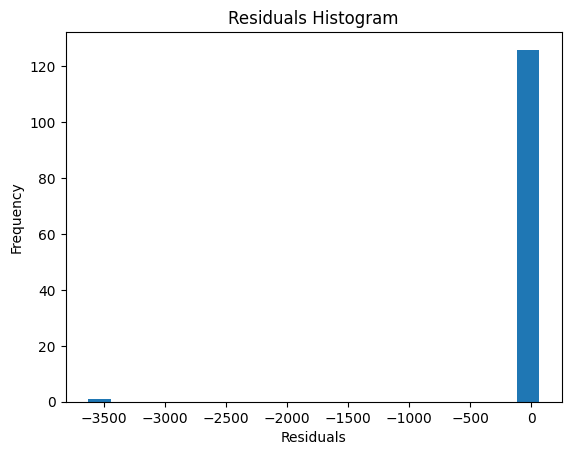

LOOCV NN with hidden layer sizes:  (200, 100)


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


R squared (LOOCV): -0.30129041205953344
Average MSE (LOOCV): 1364382.8343506993
Average RMSE (LOOCV): 1168.0679921779808
Average MAE (LOOCV): 626.9481770333531


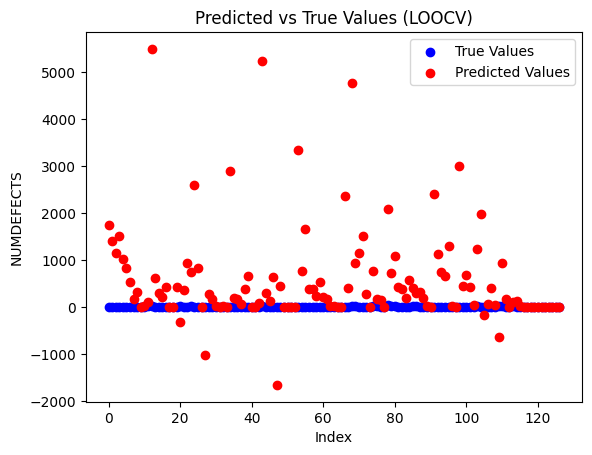

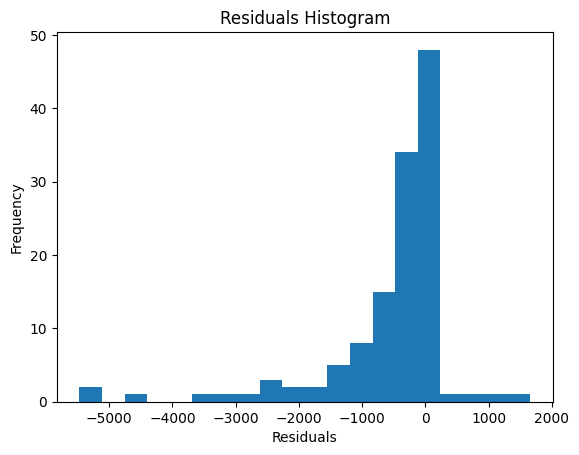

LOOCV NN with hidden layer sizes:  (300, 200, 100)
R squared (LOOCV): -0.004409905214505239
Average MSE (LOOCV): 89474.83279150848
Average RMSE (LOOCV): 299.1234407255782
Average MAE (LOOCV): 117.36697450606339


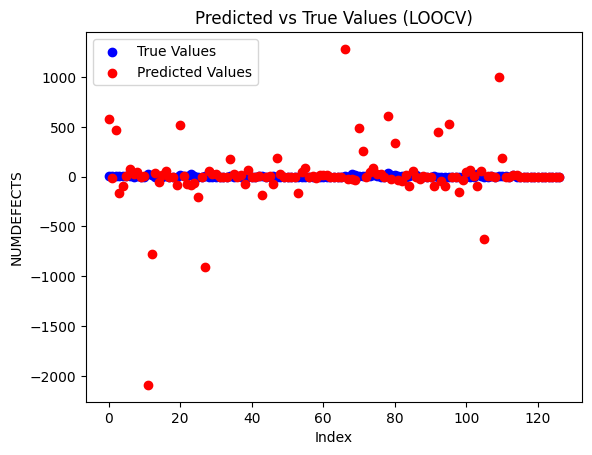

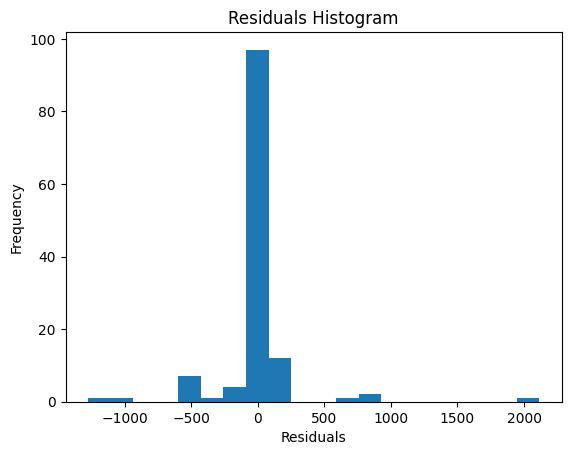

In [4]:
# Outliers excluded

for size in hidden_layer_configs:
    mlp_regressor = MLPRegressor(
        hidden_layer_sizes=size,
        activation='relu',
        solver='adam',
        alpha=0.0003,
        max_iter=1500,
        random_state=42,
    )

    print('LOOCV NN with hidden layer sizes: ', size )
    loocv(X_filtered, y_filtered, mlp_regressor)

K-fold CV NN with hidden layer sizes:  (300,)
Mean MSE: 39.75664411064711
Mean MAE: 4.314904979722894
Mean R2: -0.6400220105340756
RMSE 6.305286996691516


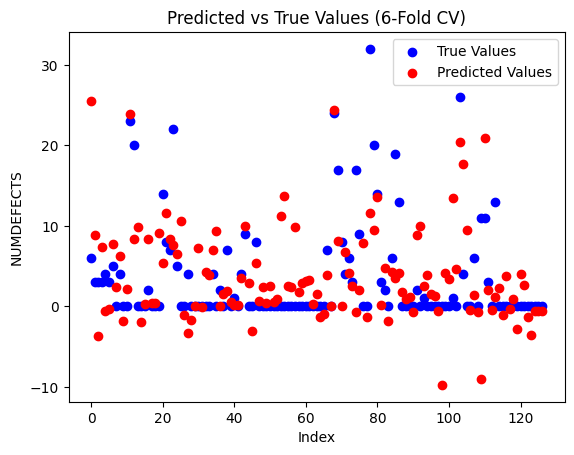

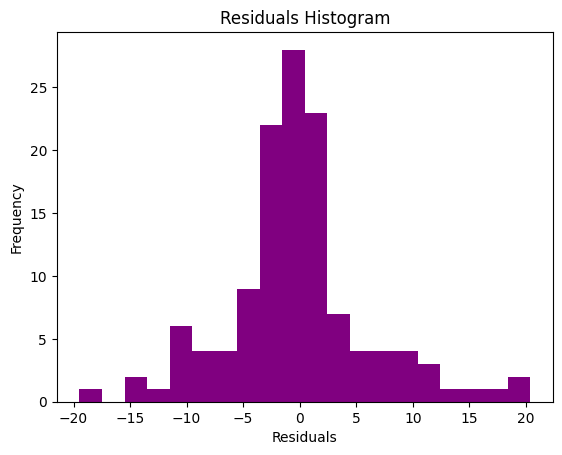

K-fold CV NN with hidden layer sizes:  (500,)
Mean MSE: 38.400136131606125
Mean MAE: 4.2377568140960244
Mean R2: -0.41834310103755196
RMSE 6.19678433799387


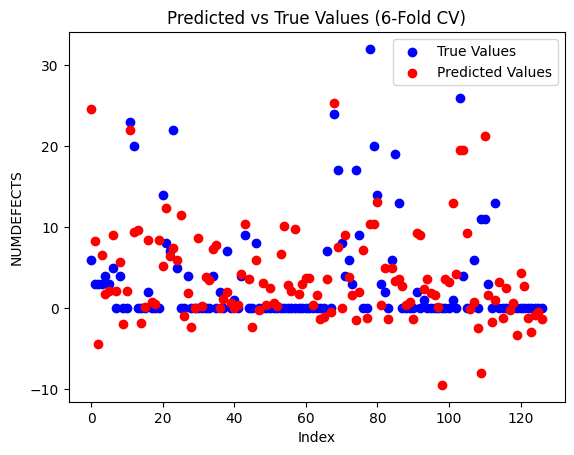

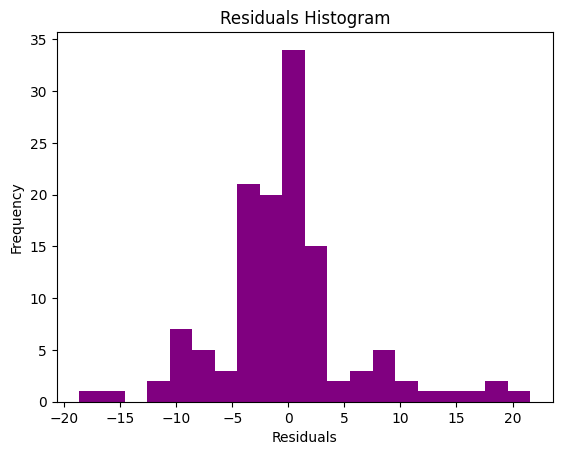

K-fold CV NN with hidden layer sizes:  (200, 100)
Mean MSE: 31.808361333412105
Mean MAE: 3.727002448945551
Mean R2: -0.21791946097344764
RMSE 5.639890188063249


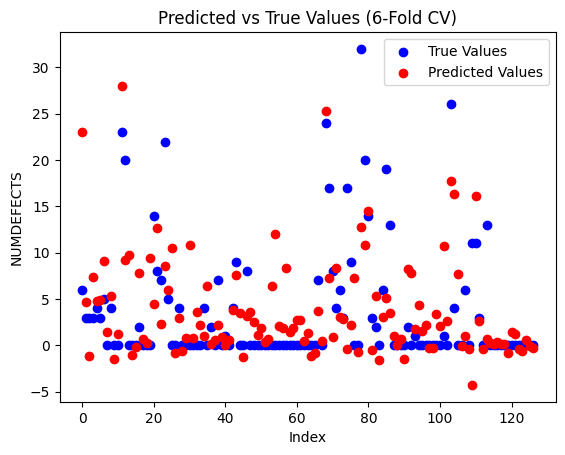

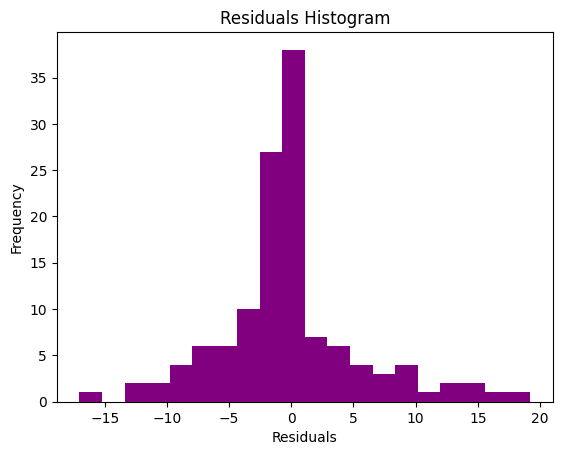

K-fold CV NN with hidden layer sizes:  (300, 200, 100)
Mean MSE: 31.542123532595976
Mean MAE: 3.3927971717391645
Mean R2: -0.25423026752038597
RMSE 5.616237488977472


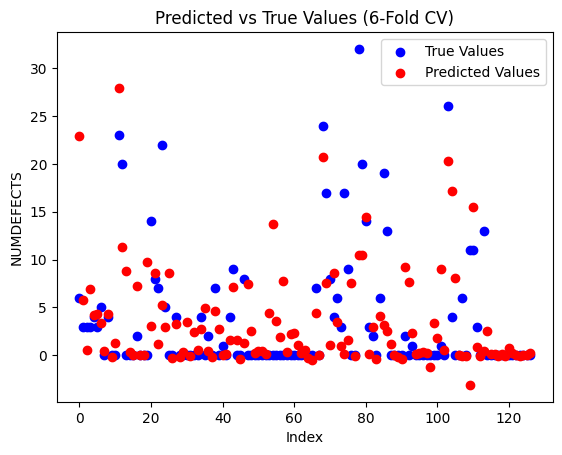

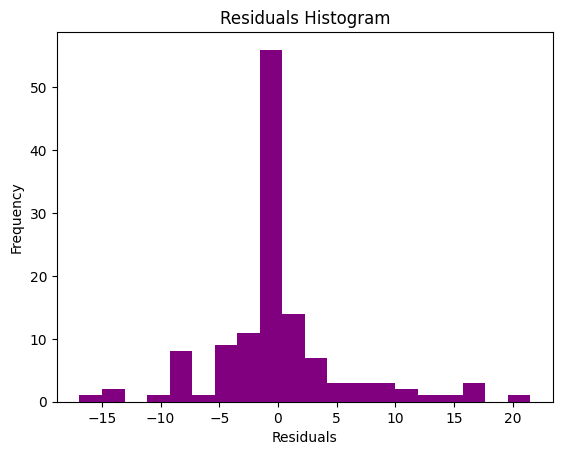

In [5]:
for size in hidden_layer_configs:
    mlp_regressor = MLPRegressor(
        hidden_layer_sizes=size,
        activation='relu',
        solver='adam',
        alpha=0.0003,
        max_iter=1500,
        random_state=42,
    )

    print('K-fold CV NN with hidden layer sizes: ', size )
    k_fold_cv(X_filtered_scaled, y_filtered, mlp_regressor, 6)
